# NEEDED LIBRARIES

In [104]:
import pandas as pd
import numpy as np
from numpy import mean
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
from joblib import dump, load
import pickle
from sklearn.metrics import ConfusionMatrixDisplay

# 1. WINE. CLASIFICACIÓN

In [2]:
wine = pd.read_csv('csv/WineQT.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


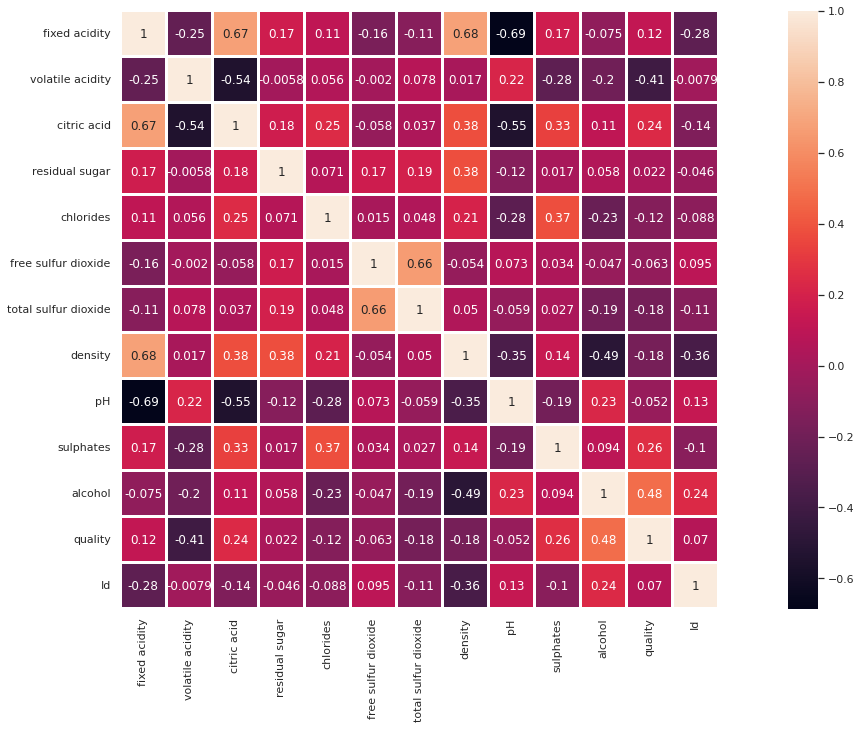

In [6]:
sns.set()
fig, ax = plt.subplots(figsize=(25,11))    
sns.heatmap(wine.corr(), square=True, annot=True, linewidths=2)

In [7]:
wine = wine.drop('Id', axis=1)
wine = wine.drop('pH', axis=1)
wine = wine.drop('chlorides', axis=1)
wine = wine.drop('free sulfur dioxide', axis=1)
wine = wine.drop('residual sugar', axis=1)

In [8]:
x_wines = wine.drop('quality', axis=1)
y_wines = wine['quality']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_wines, y_wines,train_size=0.8, test_size=0.2, random_state=1)

In [10]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3)  
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)

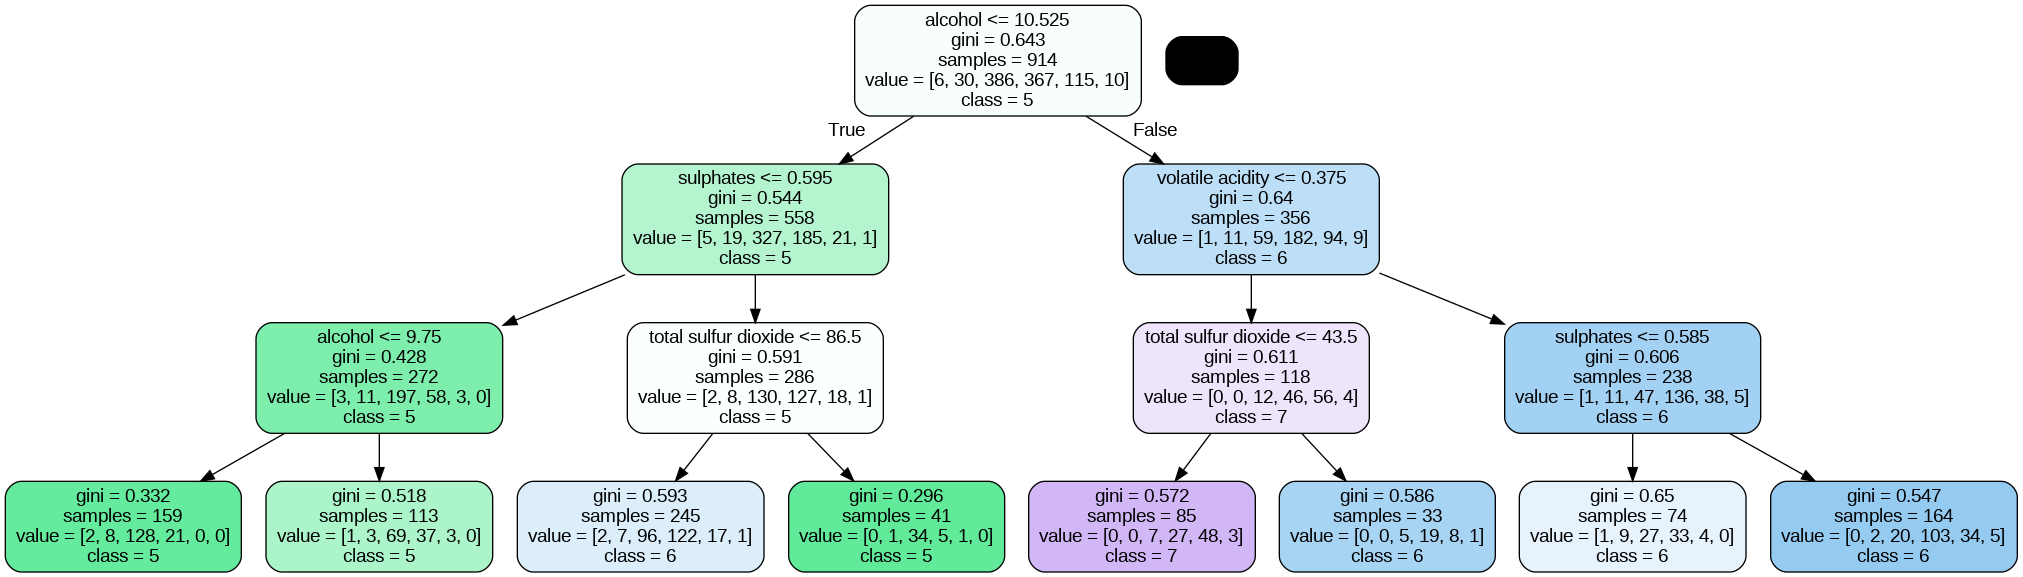

In [11]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file = dot_data, class_names=list(map(str, arbol.classes_)),feature_names = x_train.columns, rounded = True, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph [0].create_png())

In [12]:
importances = arbol.feature_importances_*100
print("Importancia:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,5),"%")

Importancia:
fixed acidity  -->  0.0 %
volatile acidity  -->  9.97686 %
citric acid  -->  0.0 %
total sulfur dioxide  -->  14.02359 %
density  -->  0.0 %
sulphates  -->  21.60245 %
alcohol  -->  54.3971 %


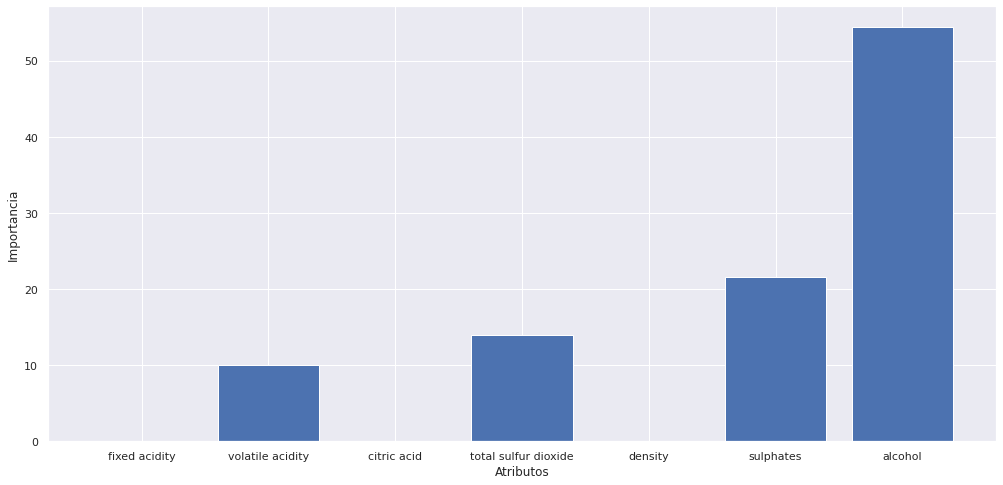

In [13]:
plt.figure(figsize=(17,8))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

In [14]:
dump(arbol, 'wine_tree.joblib')
arbol = load('wine_tree.joblib')

In [15]:
pickle.dump(arbol, open('wine_tree_model.sav', 'wb'))
loaded_model = pickle.load(open('wine_tree_model.sav', 'rb'))
y_predict = loaded_model.predict(x_test)

In [16]:
porcentaje = accuracy_score(y_test, y_predict)*100
print(round(porcentaje,3), '%')

56.769 %


In [17]:
y_predict

array([6, 5, 6, 6, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 6, 7, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 5, 6,
       6, 6, 6, 7, 7, 6, 6, 7, 5, 6, 7, 6, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 5, 6, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 6])

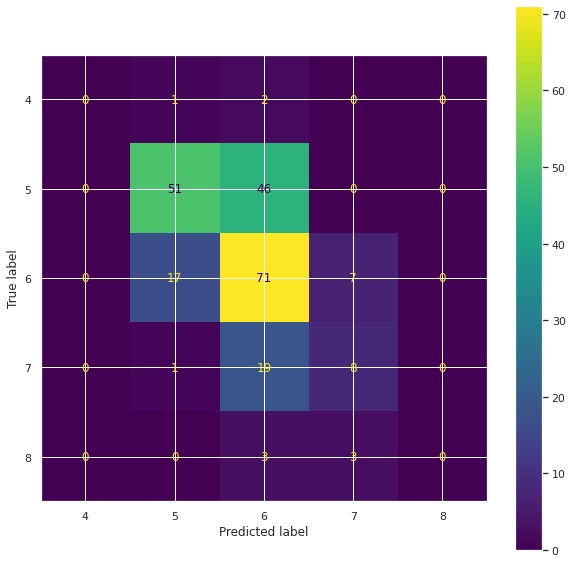

In [18]:
fi,ax= plt.subplots(figsize=(10,10))    
ConfusionMatrixDisplay.from_predictions(y_test,y_predict, ax=ax)

In [19]:
fold = KFold(n_splits=5)
options = ["gini", "entropy"]
final_gini = []
final_entropy = []

for max_depth in range(1,16):
  media_gini=[]
  media_entropy=[]

  for train_fold, test_fold in fold.split(x_train):
                                                                                                                
    x_test_kfold= x_train.iloc[test_fold]
    y_test_kfold= y_train.iloc[test_fold] 

    x_train_kfold= x_train.iloc[train_fold]
    y_train_kfold= y_train.iloc[train_fold]
    
    for option in options:
      arbol = DecisionTreeClassifier(criterion=option, max_depth=max_depth)  
      arbol.fit(x_train_kfold, y_train_kfold)
      y_predict = arbol.predict(x_test_kfold)                                                                                     
      porcentaje = round(accuracy_score(y_test_kfold, y_predict)*100,10)                                                                             

      if option == "gini":
        media_gini.append((porcentaje, max_depth, option))
        
      elif option == "entropy":
        media_entropy.append((porcentaje, max_depth, option))

  media_g = []
  for x in media_gini:
    media_g.append(x[0])
    max_depth_u=x[1]
  final_gini.append((round(mean(media_g),10), max_depth_u))
  
  media_e = []
  for x in media_entropy:
    media_e.append(x[0])
    max_depth_d=x[1]
  final_entropy.append((round(mean(media_e),10), max_depth_d))

max_gini= max(final_gini)
max_entropy= max(final_entropy)  

In [20]:
print(f"Media mas alta de Gini es: {max_gini[0]}%, con max_depth: {max_gini[1]}") 
print(f"Media mas alta de Entropy es: {max_entropy[0]}%, con max_depth: {max_entropy[1]}") 

Media mas alta de Gini es: 58.3174202846%, con max_depth: 5
Media mas alta de Entropy es: 56.0181348706%, con max_depth: 6


In [21]:
if max_gini[0]>max_entropy[0]:
  maximo_TREE=(max_gini[1],"gini")
elif max_gini[0]<max_entropy[0]:
  maximo_TREE=(max_entropy[1],"entropy")
max_depth=maximo_TREE[0]
c=maximo_TREE[1]

print(f"Los mejores hiperparametros --> max_detph: {max_depth} y criterio: {c}")

Los mejores hiperparametros --> max_detph: 5 y criterio: gini


In [22]:
arbol = DecisionTreeClassifier(criterion=c, max_depth=max_depth) 
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)

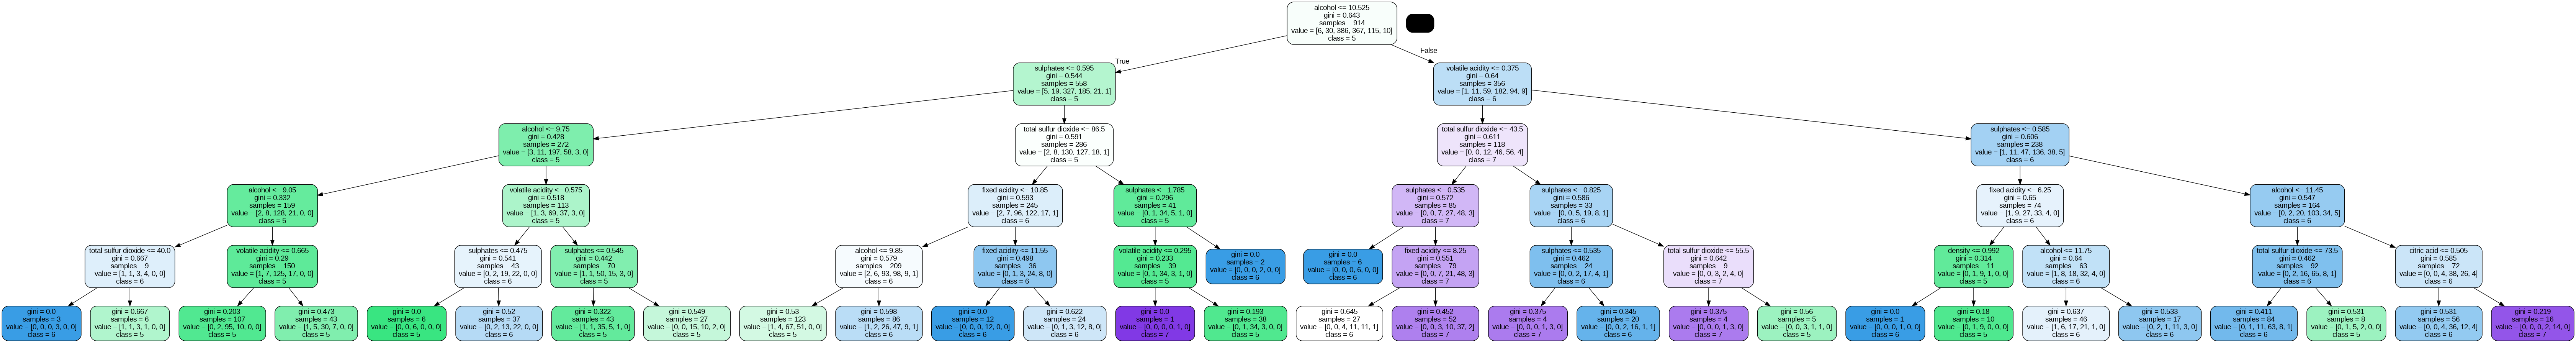

In [23]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file = dot_data, class_names=list(map(str, arbol.classes_)),feature_names = x_train.columns, rounded = True, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph [0].create_png())

In [24]:
importances = arbol.feature_importances_*100
print("Importancia:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,3),"%")

Importancia:
fixed acidity  -->  8.542 %
volatile acidity  -->  10.068 %
citric acid  -->  4.696 %
total sulfur dioxide  -->  12.234 %
density  -->  0.873 %
sulphates  -->  23.294 %
alcohol  -->  40.293 %


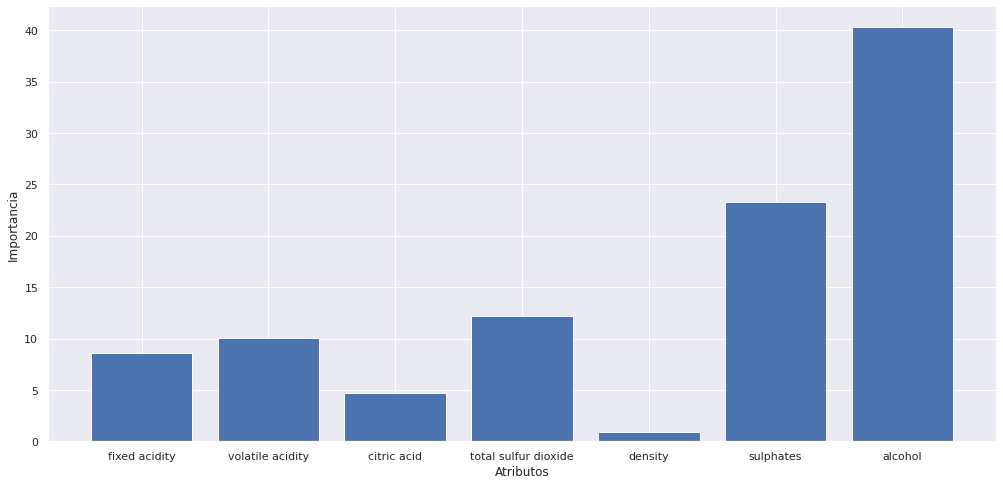

In [25]:
plt.figure(figsize=(17,8))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

In [26]:
porcentaje = accuracy_score(y_test, y_predict)*100
print(f'Accuarcy score: {round(porcentaje,4)}%')

Accuarcy score: 62.0087%


In [27]:
y_predict

array([6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 6, 6, 7, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 6, 7, 5, 5, 6, 7, 6, 5, 6, 7, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 7, 7, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5, 6, 5, 6, 6, 6,
       6, 6, 6, 7, 7, 6, 6, 7, 5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 7, 6, 5, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 7, 5, 6])

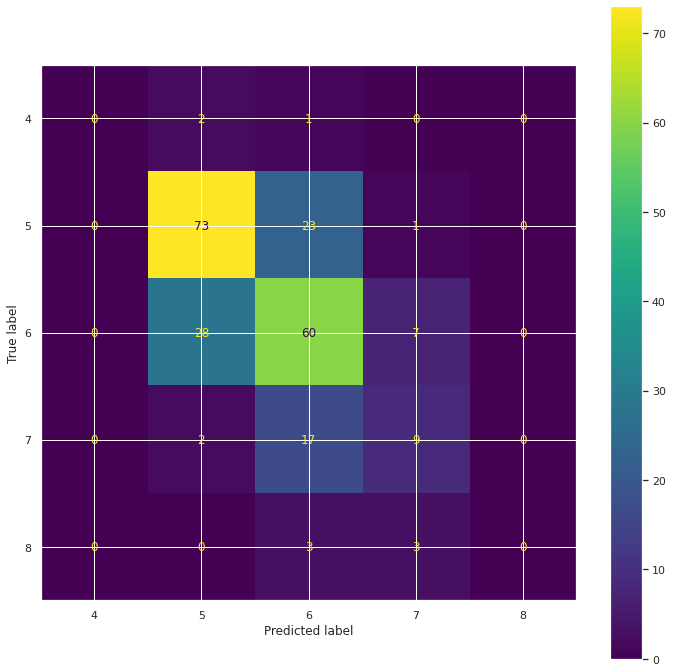

In [28]:
fi,ax= plt.subplots(figsize=(12,12))    
ConfusionMatrixDisplay.from_predictions(y_test,y_predict, ax=ax)

# 2. HEART. CLASIFICACIÓN

In [29]:
heart = pd.read_csv('csv/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [30]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [32]:
heart.describe() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


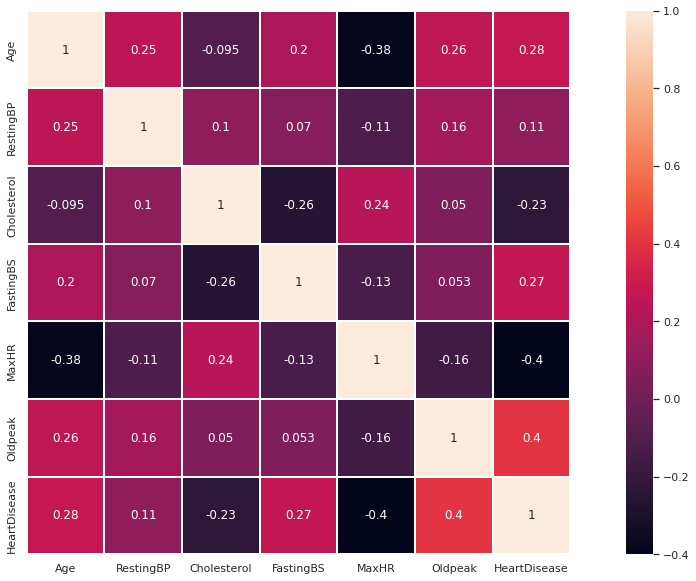

In [33]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))    
sns.heatmap(heart.corr(), square=True, annot=True, linewidths=1)

In [34]:
heart = heart.drop('RestingBP', axis=1)
heart = heart.drop('Cholesterol', axis=1)
heart = heart.drop('Age', axis=1) 

In [35]:
heart['HeartDisease'].replace({0: 'Normal', 1: 'HeartDisease'}, inplace=True)

le = preprocessing.LabelEncoder() 
heart['Sex'] = le.fit_transform(heart.Sex.values)
heart['ChestPainType'] = le.fit_transform(heart.ChestPainType.values)
heart['RestingECG'] = le.fit_transform(heart.RestingECG.values)
heart['ExerciseAngina'] = le.fit_transform(heart.ExerciseAngina.values)
heart['ST_Slope'] = le.fit_transform(heart.ST_Slope.values)

In [36]:
x_hearts = heart.drop('HeartDisease', axis=1)
y_hearts = heart['HeartDisease']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_hearts, y_hearts,train_size=0.8, test_size=0.2,random_state=1)

In [38]:
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3) 
arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_predict = arbol.predict(x_test)
y_predict

array(['HeartDisease', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'HeartDisease', 'Normal', 'HeartDisease', 'HeartDisease',
       'HeartDisease', 'Normal', 'HeartDisease', 'Normal', 'HeartDisease',
       'HeartDisease', 'Normal', 'HeartDisease', 'HeartDisease', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'HeartDisease',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'Normal', 'HeartDisease', 'Normal', 'Normal', 'HeartDisease',
       'Normal', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'Normal', 'HeartDisease', 'Normal', 'HeartDisease', 'Normal',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'HeartDisease', 'HeartDisease', 'HeartDisease', 'Norma

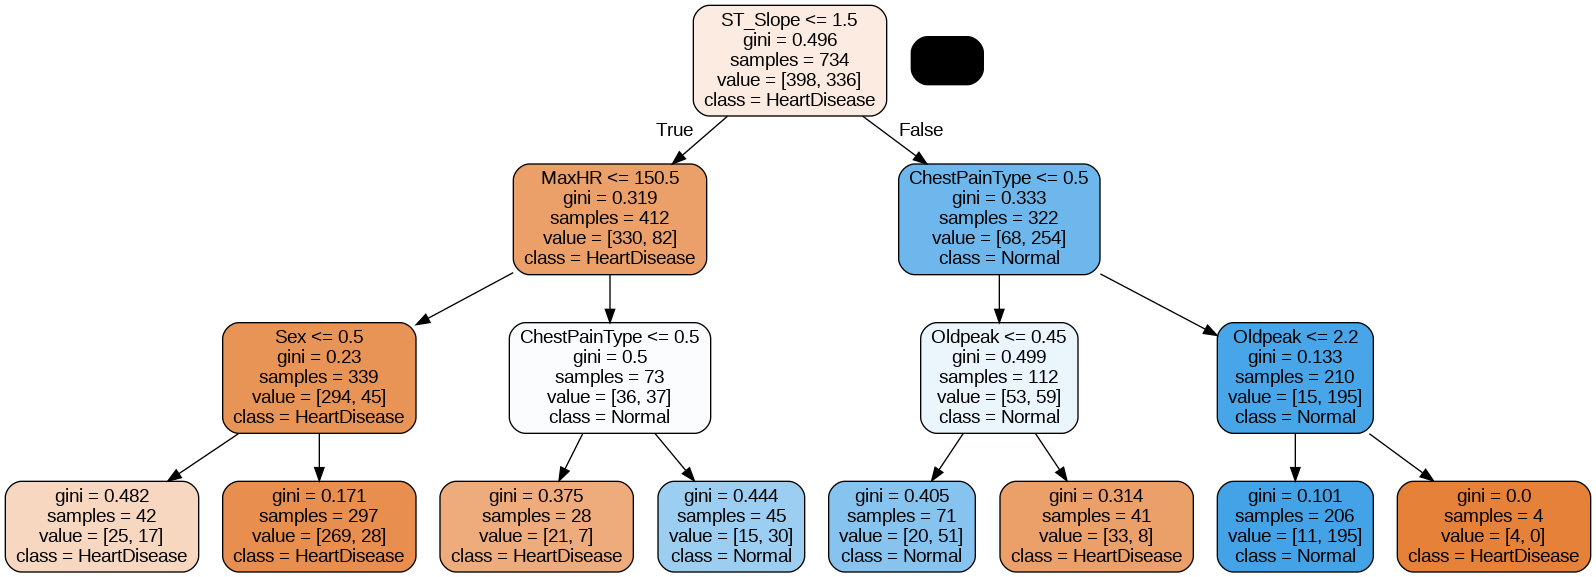

In [40]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file = dot_data, class_names=list(map(str, arbol.classes_)),feature_names = x_train.columns, rounded = True, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph [0].create_png())

In [41]:
importances = arbol.feature_importances_*100
print("Importancias -->")
for feature, importance in zip(x_train.columns, importances):
       print(feature, "--> ", round(importance,6),"%")

Importancias -->
Sex -->  3.538612 %
ChestPainType -->  14.75218 %
FastingBS -->  0.0 %
RestingECG -->  0.0 %
MaxHR -->  8.386061 %
ExerciseAngina -->  0.0 %
Oldpeak -->  10.604541 %
ST_Slope -->  62.718605 %


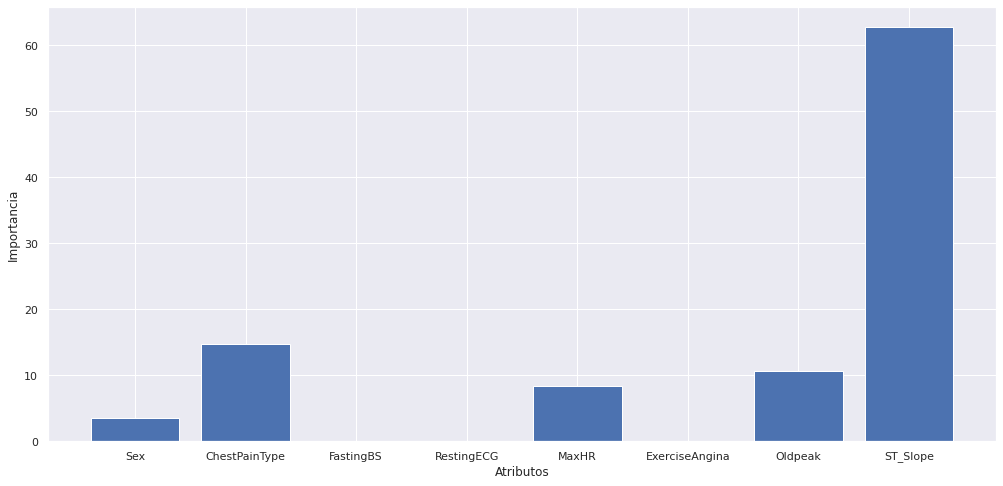

In [42]:
plt.figure(figsize=(17,8))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

In [43]:
dump(arbol, 'arbol_heart.joblib')
arbol = load('arbol_heart.joblib')

In [44]:
filename = 'heart_tree_model.sav'
pickle.dump(arbol, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
y_predict = loaded_model.predict(x_test)

In [45]:
porcentaje = accuracy_score(y_test, y_predict)*100
print(f'Accuarcy score {round(porcentaje,3)}%')

Accuarcy score 87.5%


In [46]:
y_predict

array(['HeartDisease', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'HeartDisease', 'Normal', 'HeartDisease', 'HeartDisease',
       'HeartDisease', 'Normal', 'HeartDisease', 'Normal', 'HeartDisease',
       'HeartDisease', 'Normal', 'HeartDisease', 'HeartDisease', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'HeartDisease',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'Normal', 'HeartDisease', 'Normal', 'Normal', 'HeartDisease',
       'Normal', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'Normal', 'HeartDisease', 'Normal', 'HeartDisease', 'Normal',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'HeartDisease', 'HeartDisease', 'HeartDisease', 'Norma

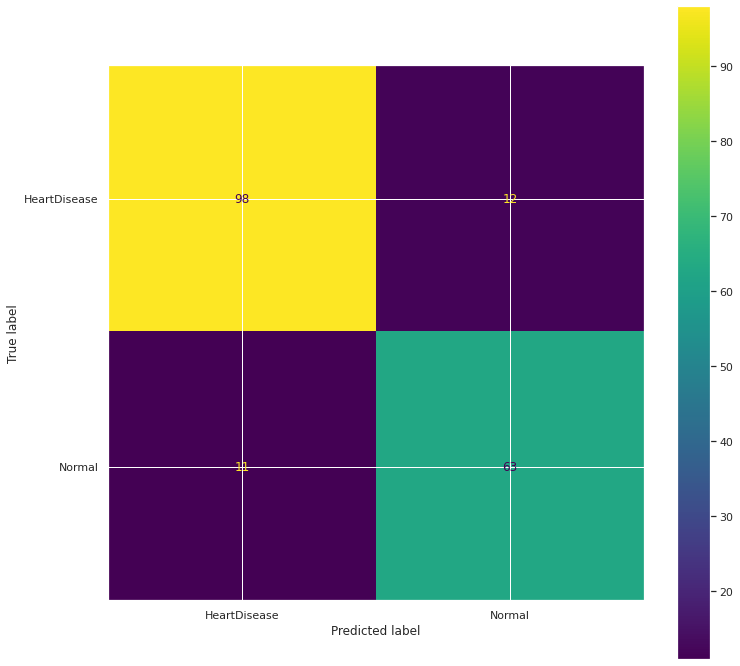

In [47]:
fi,ax= plt.subplots(figsize=(12,12))    
ConfusionMatrixDisplay.from_predictions(y_test,y_predict, ax=ax)

In [48]:
fold = KFold(n_splits=5)
options = ["gini", "entropy"]
final_gini = []
final_entropy = []

for max_depth in range(1,16):
  media_gini=[]
  media_entropy=[]

  for train_fold, test_fold in fold.split(x_train):                                                                                                       
    x_test_kfold= x_train.iloc[test_fold]
    y_test_kfold= y_train.iloc[test_fold] 
    x_train_kfold= x_train.iloc[train_fold]
    y_train_kfold= y_train.iloc[train_fold]
    
    for option in options:
      arbol = DecisionTreeClassifier(criterion=option, max_depth=max_depth)  
      arbol.fit(x_train_kfold, y_train_kfold)
      y_predict = arbol.predict(x_test_kfold)                                                                                     
      porcentaje = round(accuracy_score(y_test_kfold, y_predict)*100,10)                                                                             

      if option == "gini":
        media_gini.append((porcentaje, max_depth, option))
      elif option == "entropy":
        media_entropy.append((porcentaje, max_depth, option))

  media_g = []
  for x in media_gini:
    media_g.append(x[0])
    max_depth_u=x[1]
  final_gini.append((round(mean(media_g),10), max_depth_u))
  
  media_e = []
  for x in media_entropy:
    media_e.append(x[0])
    max_depth_d=x[1]
  final_entropy.append((round(mean(media_e),10), max_depth_d))

max_gini= max(final_gini)
max_entropy= max(final_entropy)  

In [49]:
print(f"Media mas alta de Gini es: {max_gini[0]}%, con max_depth: {max_gini[1]}") 
print(f"Media mas alta de Entropy es: {max_entropy[0]}%, con max_depth: {max_entropy[1]}") 

Media mas alta de Gini es: 84.1925263256%, con max_depth: 3
Media mas alta de Entropy es: 83.9204174821%, con max_depth: 3


In [50]:
if max_gini[0]>max_entropy[0]:
  maximo_TREE=(max_gini[1],"gini")
elif max_gini[0]<max_entropy[0]:
  maximo_TREE=(max_entropy[1],"entropy")
max_depth=maximo_TREE[0]
c=maximo_TREE[1]

print(f"Los mejores hiperparametros --> max_detph: {max_depth} y criterio: {c}")

Los mejores hiperparametros --> max_detph: 3 y criterio: gini


In [51]:
arbol = DecisionTreeClassifier(criterion=c, max_depth=max_depth) 
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)

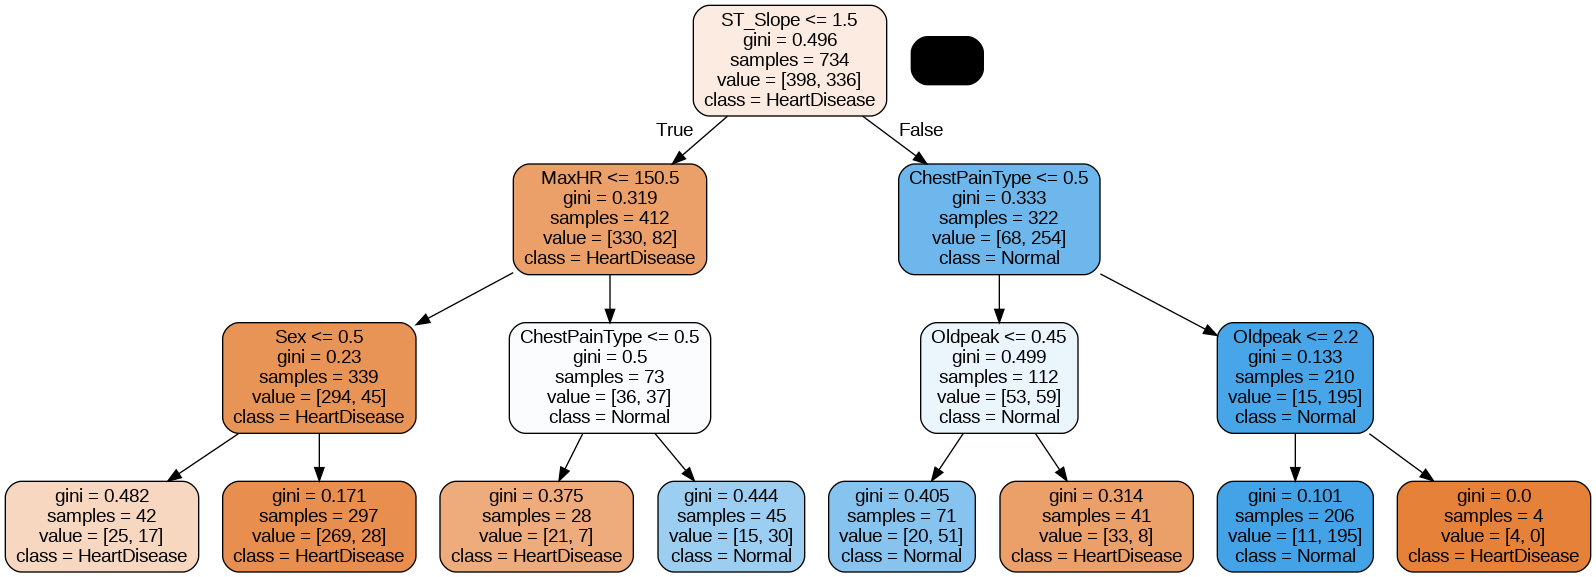

In [52]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file = dot_data, class_names=list(map(str, arbol.classes_)),feature_names = x_train.columns, rounded = True, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph [0].create_png())

In [53]:
importances = arbol.feature_importances_*100
print("Importancia de los distintos atributos:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,3),"%")

Importancia de los distintos atributos:
Sex  -->  3.539 %
ChestPainType  -->  14.752 %
FastingBS  -->  0.0 %
RestingECG  -->  0.0 %
MaxHR  -->  8.386 %
ExerciseAngina  -->  0.0 %
Oldpeak  -->  10.605 %
ST_Slope  -->  62.719 %


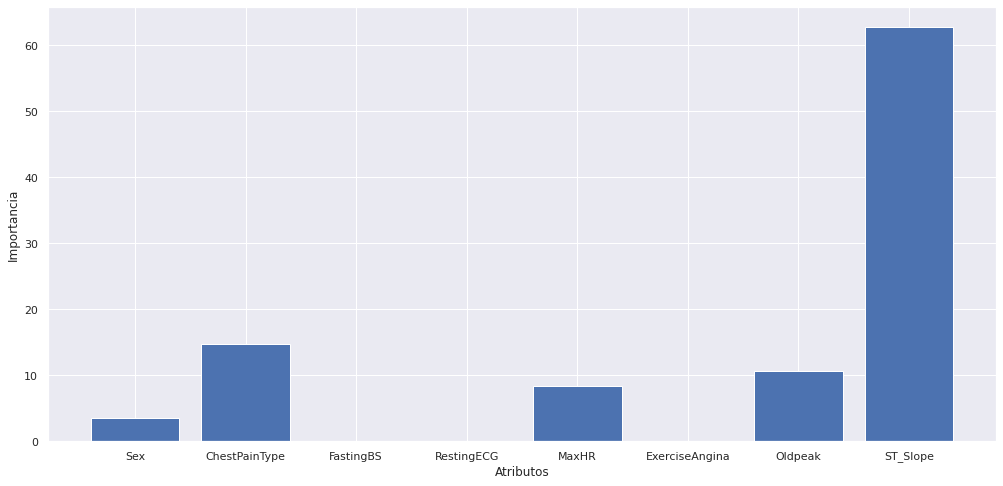

In [54]:
plt.figure(figsize=(17,8))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

In [55]:
porcentaje = accuracy_score(y_test, y_predict)*100
print(f'Accuarcy score: {round(porcentaje,4)}%')

Accuarcy score: 87.5%


In [56]:
y_predict

array(['HeartDisease', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'HeartDisease', 'Normal', 'HeartDisease', 'HeartDisease',
       'HeartDisease', 'Normal', 'HeartDisease', 'Normal', 'HeartDisease',
       'HeartDisease', 'Normal', 'HeartDisease', 'HeartDisease', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'HeartDisease',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'Normal', 'HeartDisease', 'Normal', 'Normal', 'HeartDisease',
       'Normal', 'HeartDisease', 'HeartDisease', 'Normal', 'Normal',
       'Normal', 'HeartDisease', 'Normal', 'HeartDisease', 'Normal',
       'HeartDisease', 'HeartDisease', 'HeartDisease', 'HeartDisease',
       'Normal', 'HeartDisease', 'HeartDisease', 'HeartDisease', 'Norma

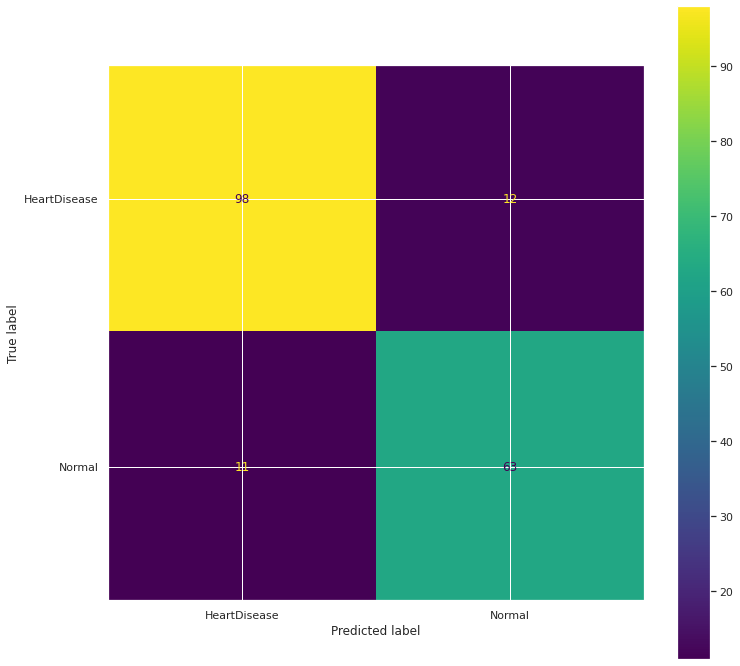

In [57]:
fi,ax= plt.subplots(figsize=(12,12))    
ConfusionMatrixDisplay.from_predictions(y_test,y_predict, ax=ax)

# 3. BOSTON. REGRESIÓN

In [58]:
boston = pd.read_csv('csv/housing.csv')
boston

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [59]:
boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [60]:
boston.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [61]:
boston.describe() 

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


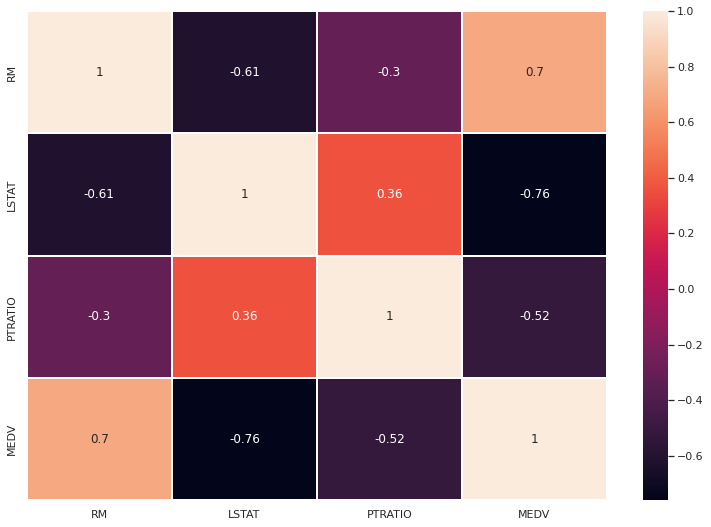

In [62]:
sns.set()
fig, ax = plt.subplots(figsize=(13,9))    
sns.heatmap(boston.corr(), square=False, annot=True, linewidths=1)

In [63]:
boston = boston.drop('PTRATIO', axis=1)

In [64]:
x_boston = boston.drop('MEDV', axis=1)
y_boston = boston['MEDV']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_boston, y_boston,train_size=0.8, test_size=0.2, random_state=1)

In [66]:
arbol = DecisionTreeRegressor(criterion='squared_error', max_depth=3)  
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)
y_predict

array([348294.54545455, 433468.96551724, 433468.96551724, 905700.        ,
       433468.96551724, 433468.96551724, 348294.54545455, 501709.09090909,
       261821.53846154, 501709.09090909, 433468.96551724, 592597.2972973 ,
       433468.96551724, 501709.09090909, 261821.53846154, 433468.96551724,
       501709.09090909, 433468.96551724, 501709.09090909, 605780.        ,
       433468.96551724, 433468.96551724, 261821.53846154, 592597.2972973 ,
       701711.11111111, 433468.96551724, 433468.96551724, 348294.54545455,
       261821.53846154, 433468.96551724, 701711.11111111, 592597.2972973 ,
       605780.        , 701711.11111111, 433468.96551724, 433468.96551724,
       501709.09090909, 433468.96551724, 905700.        , 433468.96551724,
       348294.54545455, 348294.54545455, 261821.53846154, 433468.96551724,
       261821.53846154, 433468.96551724, 501709.09090909, 501709.09090909,
       501709.09090909, 501709.09090909, 433468.96551724, 433468.96551724,
       433468.96551724, 7

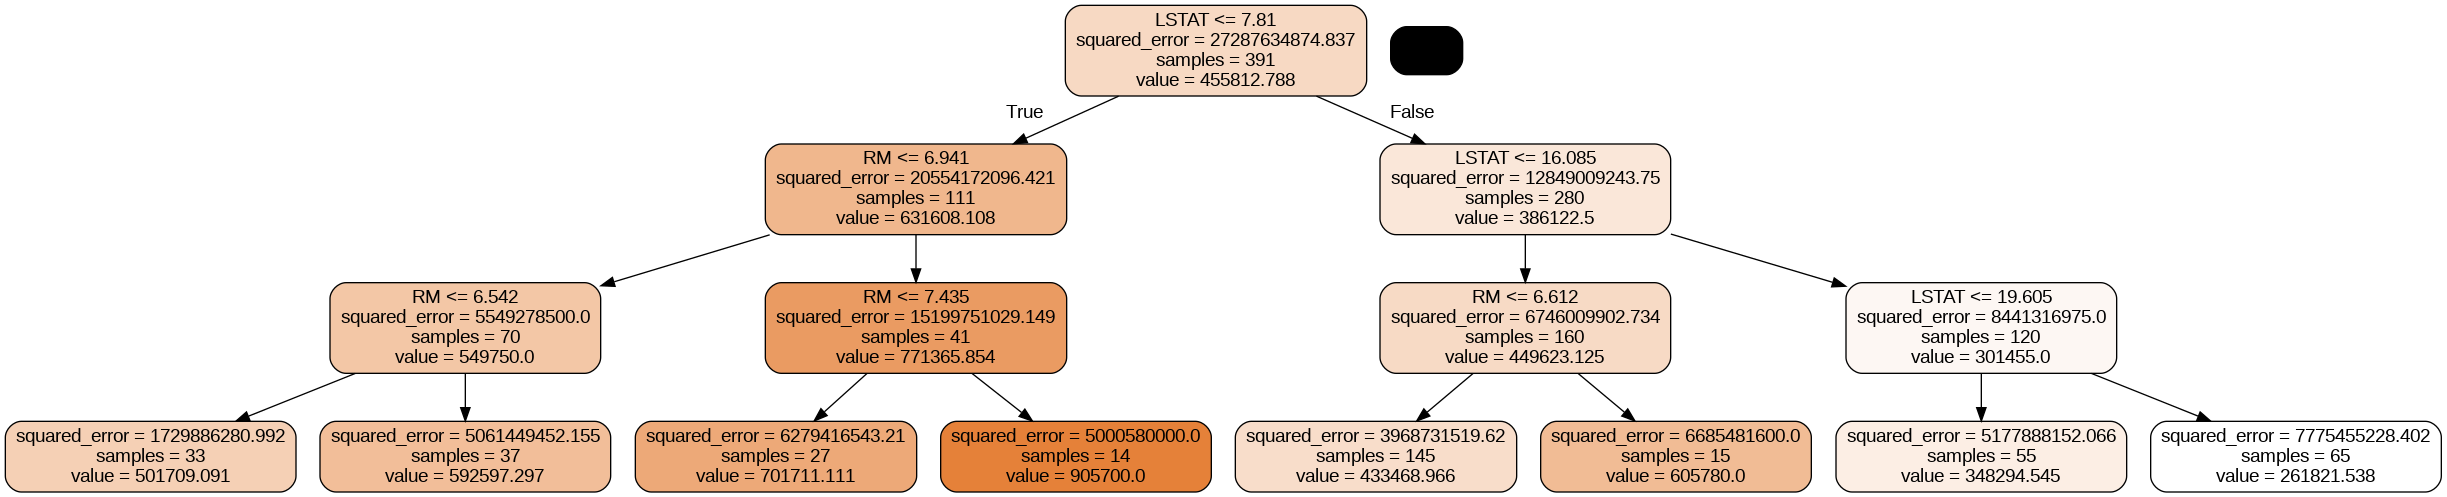

In [67]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file = dot_data, feature_names = x_train.columns, rounded = True, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph [0].create_png())

In [68]:
importances = arbol.feature_importances_*100
print("Importancias:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,6),"%")

Importancias:
RM  -->  25.244392 %
LSTAT  -->  74.755608 %


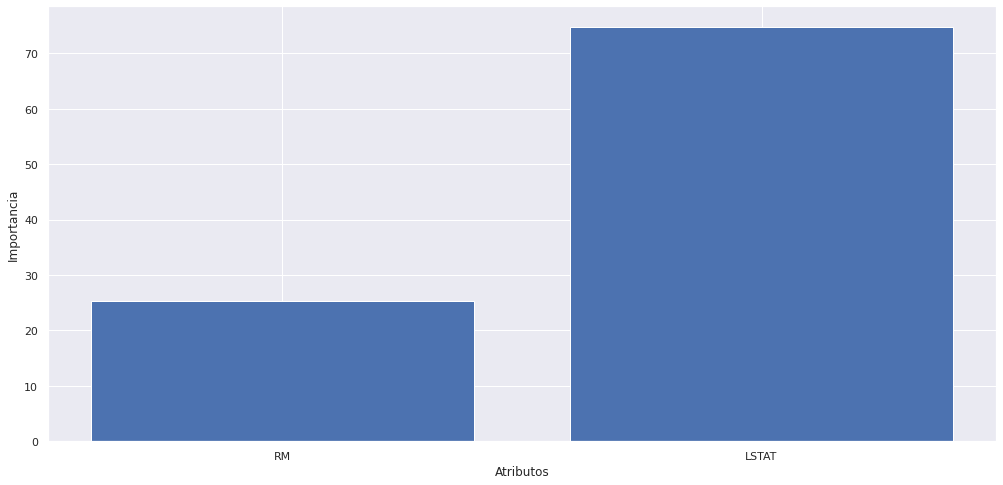

In [69]:
plt.figure(figsize=(17,8))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

In [70]:
dump(arbol, 'arbol_boston.joblib')
arbol = load('arbol_boston.joblib')

In [71]:
filename = 'decision_tree_model.sav'
pickle.dump(arbol, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
y_predict = loaded_model.predict(x_test)

In [72]:
mean_error = mean_squared_error(y_test, y_predict, squared=False)
abs_error = mean_absolute_error(y_test, y_predict)
print(f'Error cuadrático medio: {mean_error}')
print(f'Error absoluto medio: {abs_error}')

Error cuadrático medio: 80524.69771788825
Error absoluto medio: 56549.86908711046


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


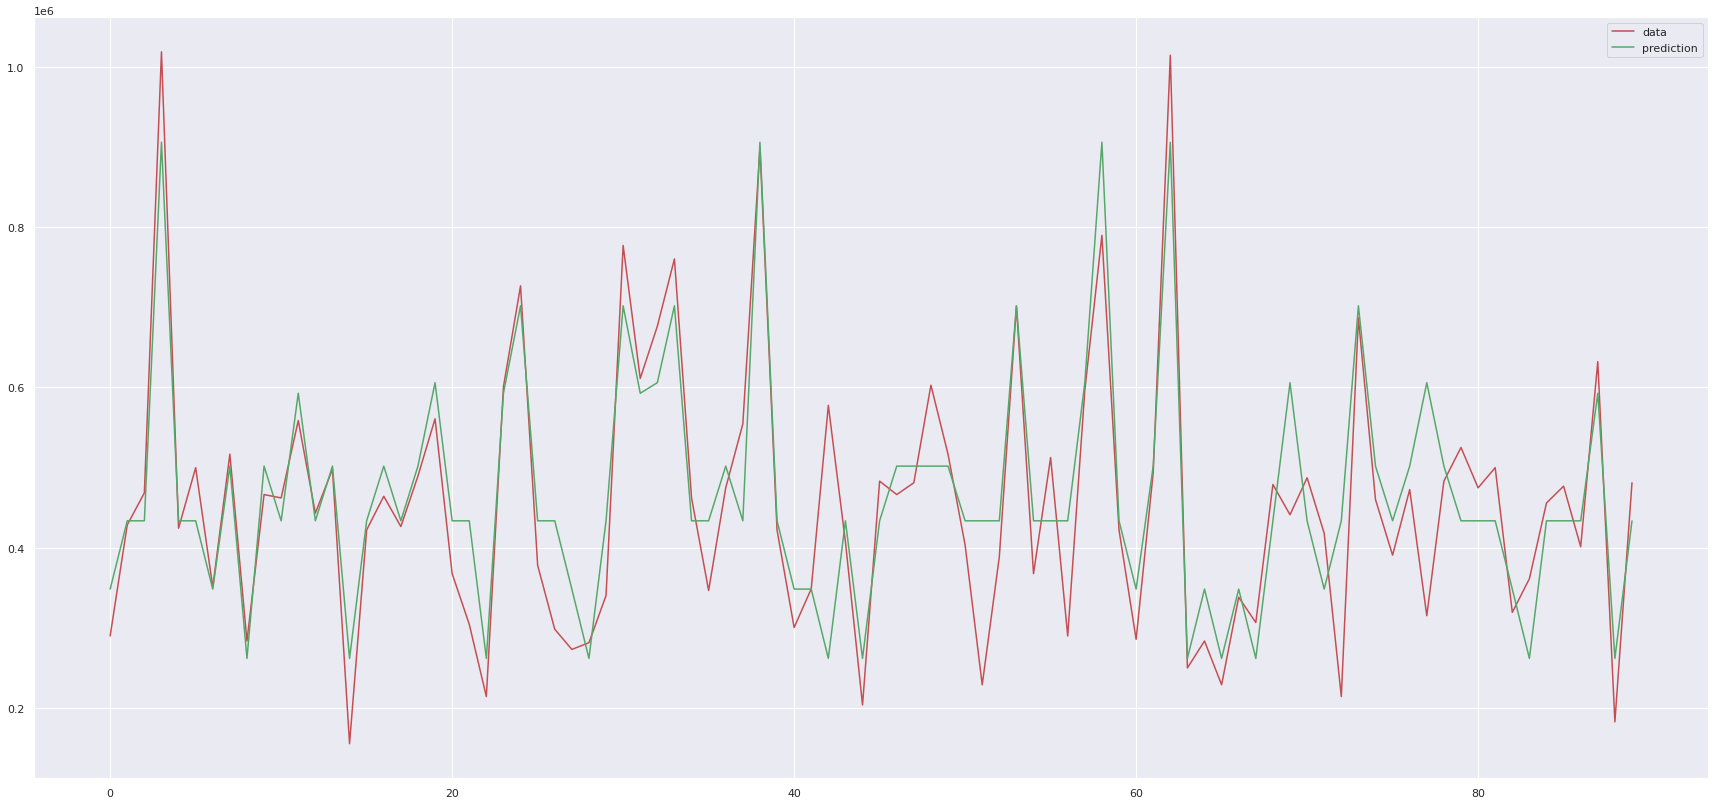

In [73]:
plt.figure(figsize=(30,14))
xx = np.stack(i for i in range(90))
plt.plot(xx, y_test[:90], c='r', label='data')
plt.plot(xx, y_predict[:90], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

In [74]:
fold = KFold(n_splits=5)

squared = []
friedman = []
absolute = []
poisson = []

options = ["squared_error", "friedman_mse", "absolute_error", "poisson"]

for max_depth in range(1,16):
  mediaSquared=[]
  mediaFriedman=[]
  mediaAbsolute=[]
  mediaPoisson=[]

  for train_fold, test_fold in fold.split(x_train):                                                                                                         
    x_test_kfold= x_train.iloc[test_fold]
    y_test_kfold= y_train.iloc[test_fold]
    x_train_kfold= x_train.iloc[train_fold]
    y_train_kfold= y_train.iloc[train_fold]
    
    for option in options:
      arbol = DecisionTreeRegressor(criterion=option, max_depth=max_depth)  
      arbol.fit(x_train_kfold, y_train_kfold)
      y_predict = arbol.predict(x_test_kfold)                                                                                     
      error=mean_absolute_error(y_test_kfold, y_predict)

      if option == "squared_error":
        mediaSquared.append((error, max_depth, option))
      elif option == "friedman_mse":
        mediaFriedman.append((error, max_depth, option))
      elif option == "absolute_error":
        mediaAbsolute.append((error, max_depth, option))
      elif option == "poisson":
        mediaPoisson.append((error, max_depth, option))
    
  media_s = []
  for x in mediaSquared:
    media_s.append(x[0])
    kU=x[1]
  squared.append((round(mean(media_s),5), kU))
  
  media_f = []
  for x in mediaFriedman:
    media_f.append(x[0])
    kD=x[1]
  friedman.append((round(mean(media_f),5), kD))
  
  media_a = []
  for x in mediaAbsolute:
    media_a.append(x[0])
    kU=x[1]
  absolute.append((round(mean(media_a),5), kU))
  
  media_p = []
  for x in mediaPoisson:
    media_p.append(x[0])
    kD=x[1]
  poisson.append((round(mean(media_p),5), kD))

In [75]:
min_Squared= min(squared)
min_Friedman= min(friedman)  
min_Absolute= min(absolute)
min_Poisson= min(poisson) 


print(f"SQUARED_ERROR: {min_Squared[0]}, max_depth: {min_Squared[1]}") 
print(f"FRIEDMAN_MSE: {min_Friedman[0]}, max_depth: {min_Friedman[1]}") 
print(f"ABSOLUTE_ERROR: {min_Absolute[0]}, max_depth: {min_Absolute[1]}") 
print(f"POISSON: {min_Poisson[0]}, max_depth: {min_Poisson[1]}") 

SQUARED_ERROR: 56881.6585, max_depth: 4
FRIEDMAN_MSE: 56881.6585, max_depth: 4
ABSOLUTE_ERROR: 59423.14995, max_depth: 5
POISSON: 86769.63407, max_depth: 15


In [76]:
minimum = min((min_Squared, "squared_error"), (min_Friedman, "friedman_mse"), (min_Absolute, "absolute_error"), (min_Poisson, "poisson"))
depths, criterio = minimum

print(f'Se usa: {criterio} con profundidad: {max_depth}')
arbol = DecisionTreeRegressor(criterion = criterio, max_depth=depths[1]) 
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)

Se usa: friedman_mse con profundidad: 15


In [77]:
error = mean_absolute_error(y_test, y_predict)
error

56063.16417525411

In [78]:
y_predict

array([367500.        , 442457.85123967, 442457.85123967, 927245.45454545,
       442457.85123967, 442457.85123967, 301481.25      , 509755.55555556,
       270701.88679245, 509755.55555556, 442457.85123967, 563372.72727273,
       442457.85123967, 509755.55555556, 222600.        , 388150.        ,
       509755.55555556, 442457.85123967, 509755.55555556, 675300.        ,
       442457.85123967, 442457.85123967, 270701.88679245, 563372.72727273,
       649425.        , 388150.        , 388150.        , 301481.25      ,
       270701.88679245, 442457.85123967, 723726.31578947, 635460.        ,
       675300.        , 723726.31578947, 442457.85123967, 442457.85123967,
       509755.55555556, 442457.85123967, 927245.45454545, 442457.85123967,
       301481.25      , 367500.        , 270701.88679245, 442457.85123967,
       270701.88679245, 442457.85123967, 509755.55555556, 509755.55555556,
       509755.55555556, 509755.55555556, 442457.85123967, 388150.        ,
       442457.85123967, 6

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


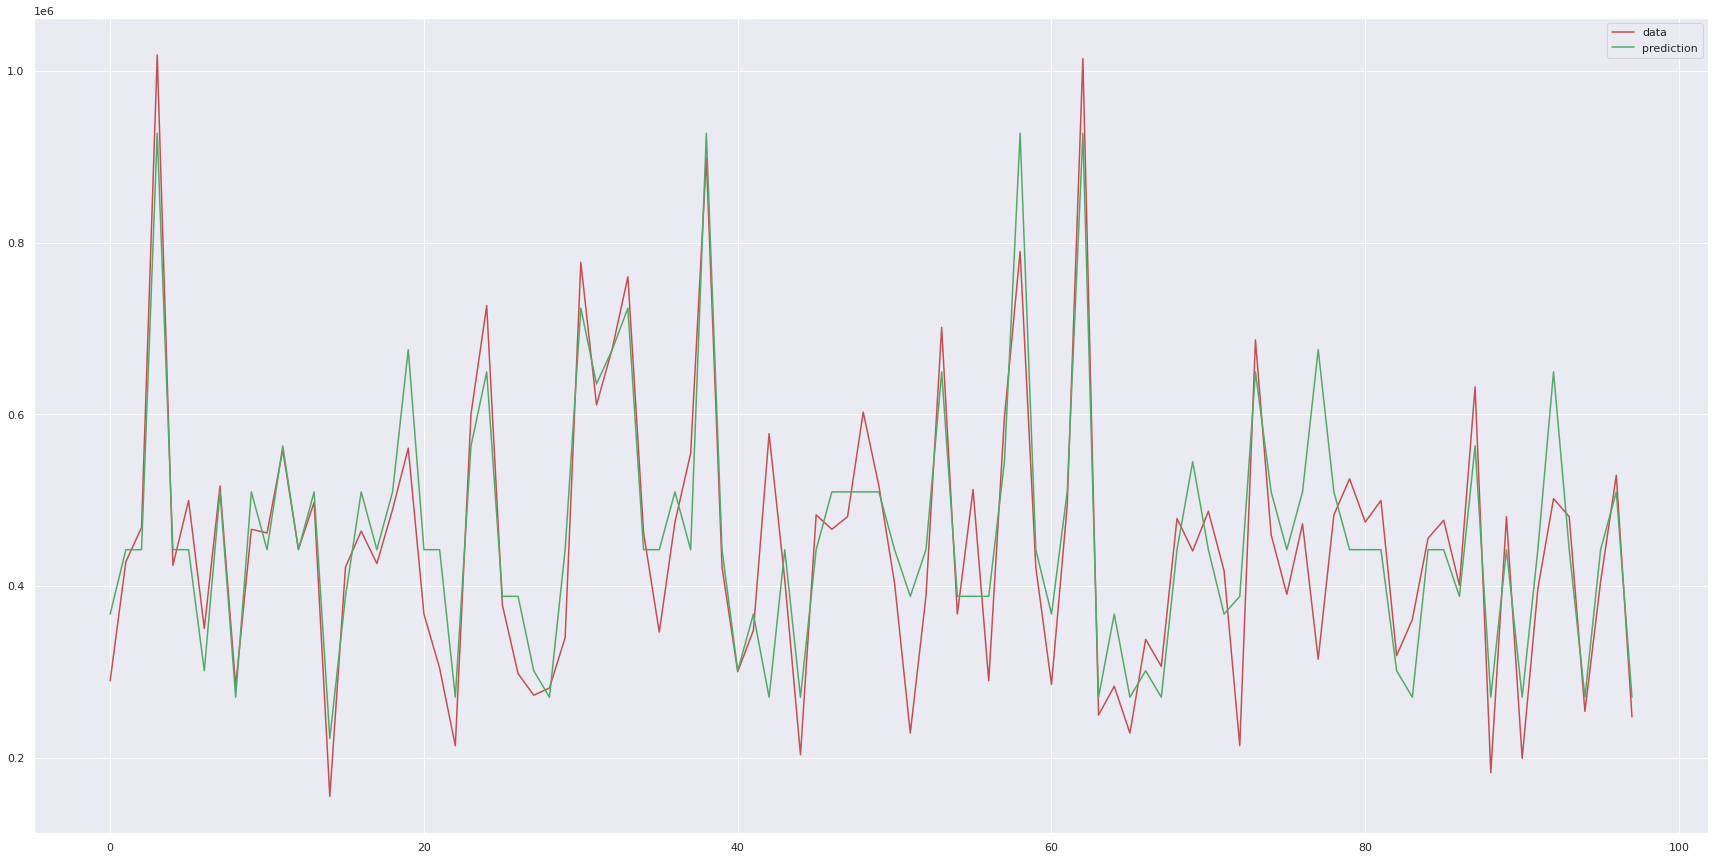

In [79]:
plt.figure(figsize=(30,15))
xx = np.stack(i for i in range(98))
plt.plot(xx, y_test[:98], c='r', label='data')
plt.plot(xx, y_predict[:98], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

In [80]:
importances = arbol.feature_importances_*100
print("Importancia:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,3),"%")

Importancia:
RM  -->  25.747 %
LSTAT  -->  74.253 %


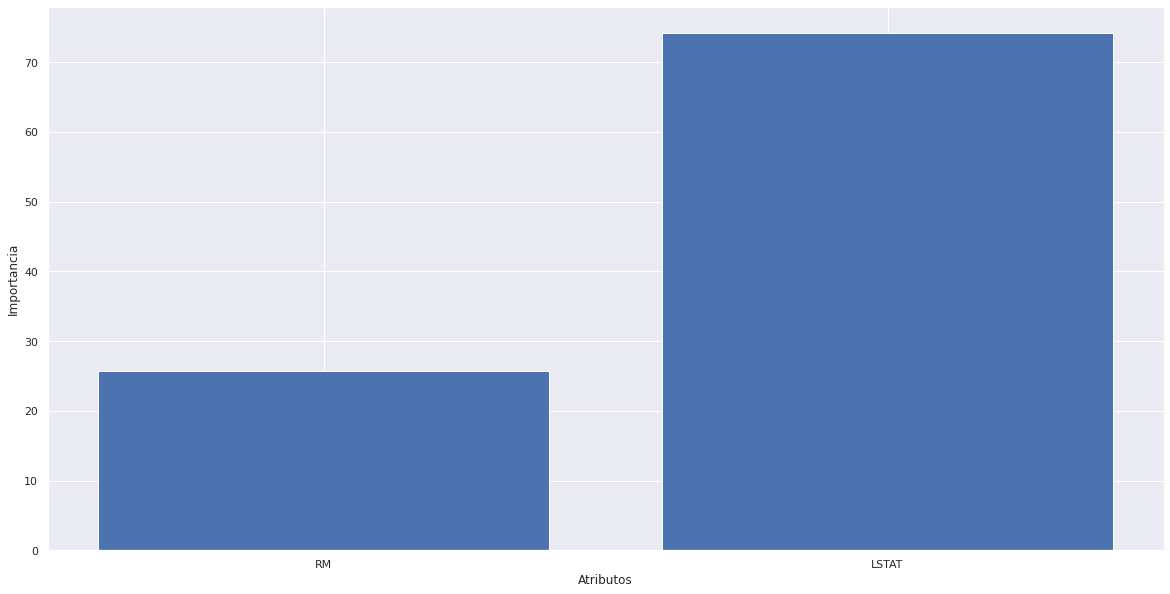

In [81]:
plt.figure(figsize=(20,10))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

# 4. BIKES PER HOUR. REGRESIÓN 

In [82]:
bikes = pd.read_csv('csv/hour.csv')
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [83]:
# Como la fecha es algo importante y no se puede refactorizar, ordenamos el data frame por fecha, y después reseteamos el índice porque si no da error.
bikes.sort_values(by='dteday', ascending=True, inplace=True)
bikes.reset_index(drop=True, inplace=True)
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,24,2011-01-01,1,0,1,23,0,6,0,2,0.46,0.4545,0.88,0.2985,15,24,39
2,23,2011-01-01,1,0,1,22,0,6,0,2,0.40,0.4091,0.94,0.2239,11,17,28
3,22,2011-01-01,1,0,1,21,0,6,0,2,0.40,0.4091,0.87,0.1940,3,31,34
4,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17357,2012-12-31,1,1,12,1,0,1,1,1,0.18,0.1818,0.55,0.1940,6,13,19
17375,17356,2012-12-31,1,1,12,0,0,1,1,1,0.18,0.1818,0.55,0.1940,4,30,34
17376,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17377,17366,2012-12-31,1,1,12,10,0,1,1,2,0.20,0.2121,0.69,0.1343,33,87,120


In [84]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,24,2011-01-01,1,0,1,23,0,6,0,2,0.46,0.4545,0.88,0.2985,15,24,39
2,23,2011-01-01,1,0,1,22,0,6,0,2,0.40,0.4091,0.94,0.2239,11,17,28
3,22,2011-01-01,1,0,1,21,0,6,0,2,0.40,0.4091,0.87,0.1940,3,31,34
4,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36


In [85]:
bikes.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17357,2012-12-31,1,1,12,1,0,1,1,1,0.18,0.1818,0.55,0.1940,6,13,19
17375,17356,2012-12-31,1,1,12,0,0,1,1,1,0.18,0.1818,0.55,0.1940,4,30,34
17376,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17377,17366,2012-12-31,1,1,12,10,0,1,1,2,0.20,0.2121,0.69,0.1343,33,87,120
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [86]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


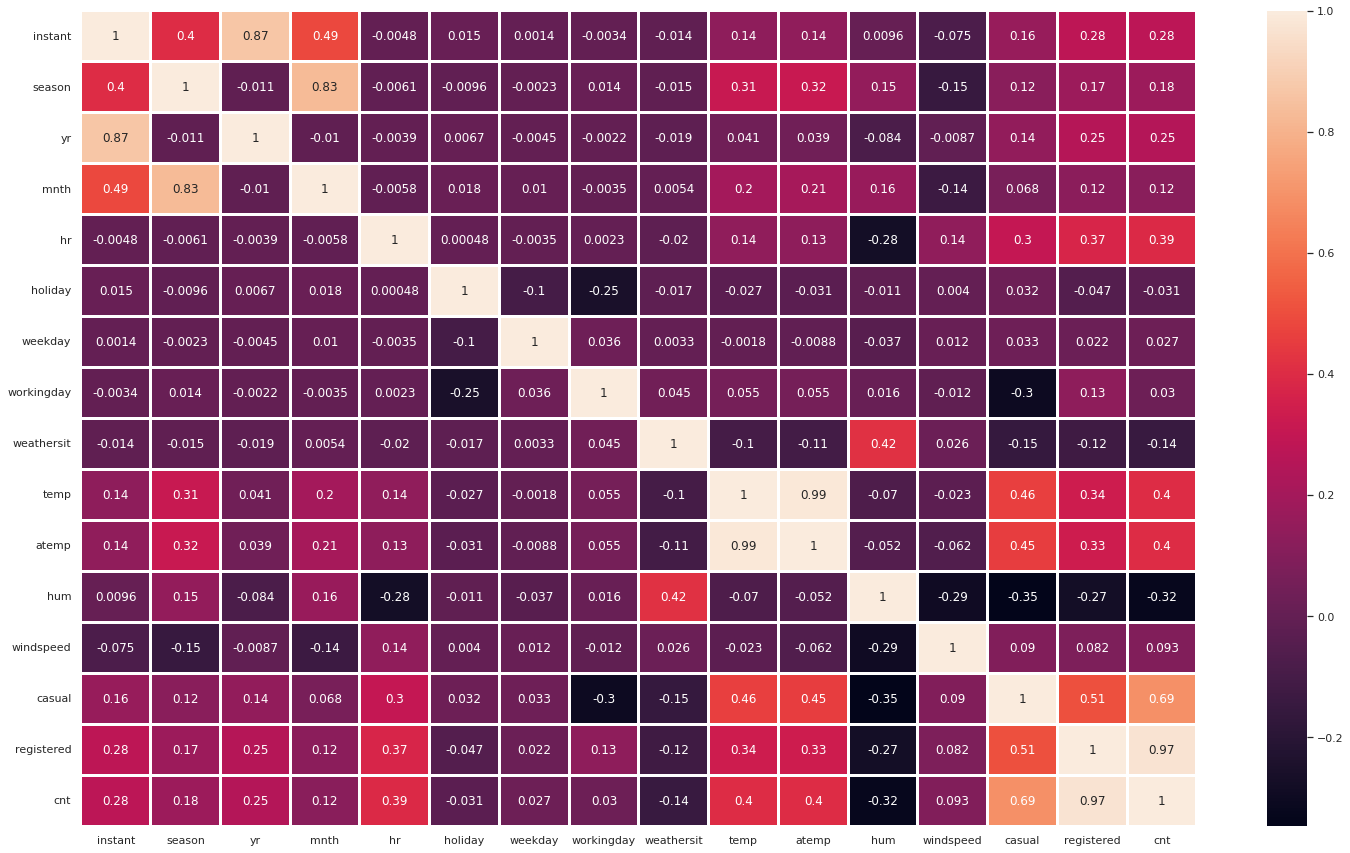

In [87]:
sns.set()
fig, ax = plt.subplots(figsize=(25,15))    
sns.heatmap(bikes.corr(), square=False, annot=True, linewidths=2)

In [88]:
# Al haber ordenado por fecha, ya se puede borrar esa columna.
bikes = bikes.drop('dteday', axis=1)

bikes = bikes.drop('windspeed', axis=1)
bikes = bikes.drop('weekday', axis=1)
bikes = bikes.drop('holiday', axis=1)
bikes = bikes.drop('instant', axis=1)
bikes = bikes.drop('atemp', axis=1)
bikes = bikes.drop('casual', axis=1) 
bikes = bikes.drop('registered', axis=1) 

In [89]:
x_bikes = bikes.drop('cnt', axis=1)
y_bikes = bikes['cnt']
x_train, x_test, y_train, y_test = train_test_split(x_bikes, y_bikes,train_size=0.8, test_size=0.2, random_state=1)

In [90]:
arbol = DecisionTreeRegressor(criterion='squared_error', max_depth=3)  
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)
y_predict

array([381.18134893, 246.90181549,  15.2512035 , ..., 381.18134893,
       381.18134893, 124.23080377])

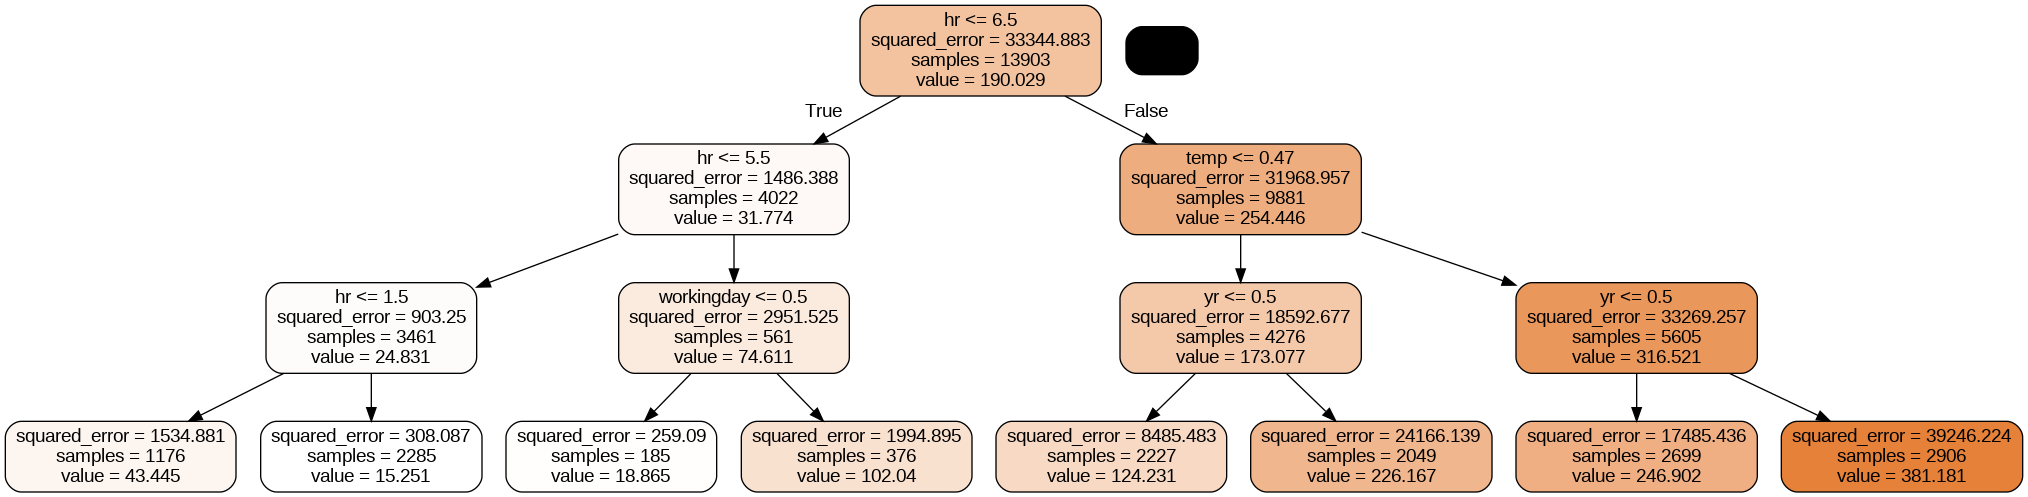

In [91]:
dot_data = StringIO()
tree.export_graphviz(arbol, out_file = dot_data, feature_names = x_train.columns, rounded = True, filled = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph [0].create_png())

In [92]:
importances = arbol.feature_importances_*100
print("Importancia:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,3),"%")


Importancia:
season  -->  0.0 %
yr  -->  15.748 %
mnth  -->  0.0 %
hr  -->  62.24 %
workingday  -->  0.372 %
weathersit  -->  0.0 %
temp  -->  21.64 %
hum  -->  0.0 %


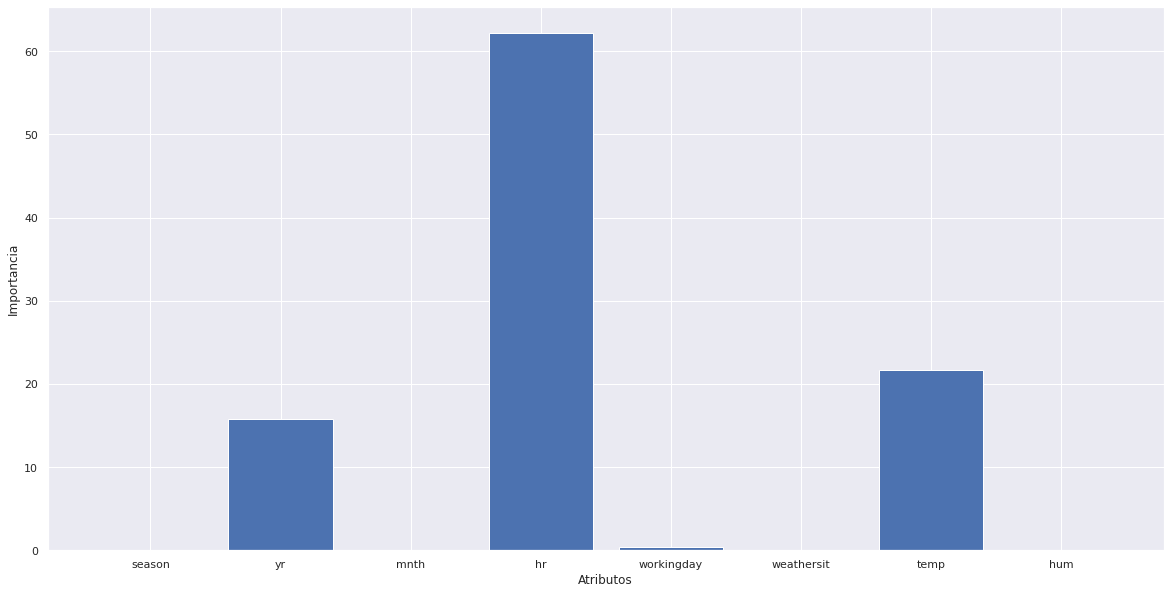

In [93]:
plt.figure(figsize=(20,10))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

In [94]:
dump(arbol, 'arbol_bikes.joblib')
arbol = load('arbol_bikes.joblib')

In [95]:
filename = 'decision_tree_model.sav'
pickle.dump(arbol, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
y_predict = loaded_model.predict(x_test)
y_predict

array([381.18134893, 246.90181549,  15.2512035 , ..., 381.18134893,
       381.18134893, 124.23080377])

In [96]:
error = mean_squared_error(y_test, y_predict, squared=False)
print('Error cuadrático medio: ', error)

Error cuadrático medio:  127.88706912903125


In [97]:
error=mean_absolute_error(y_test, y_predict)
print('Error absoluto medio: ', error)

Error absoluto medio:  89.87968302192658


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


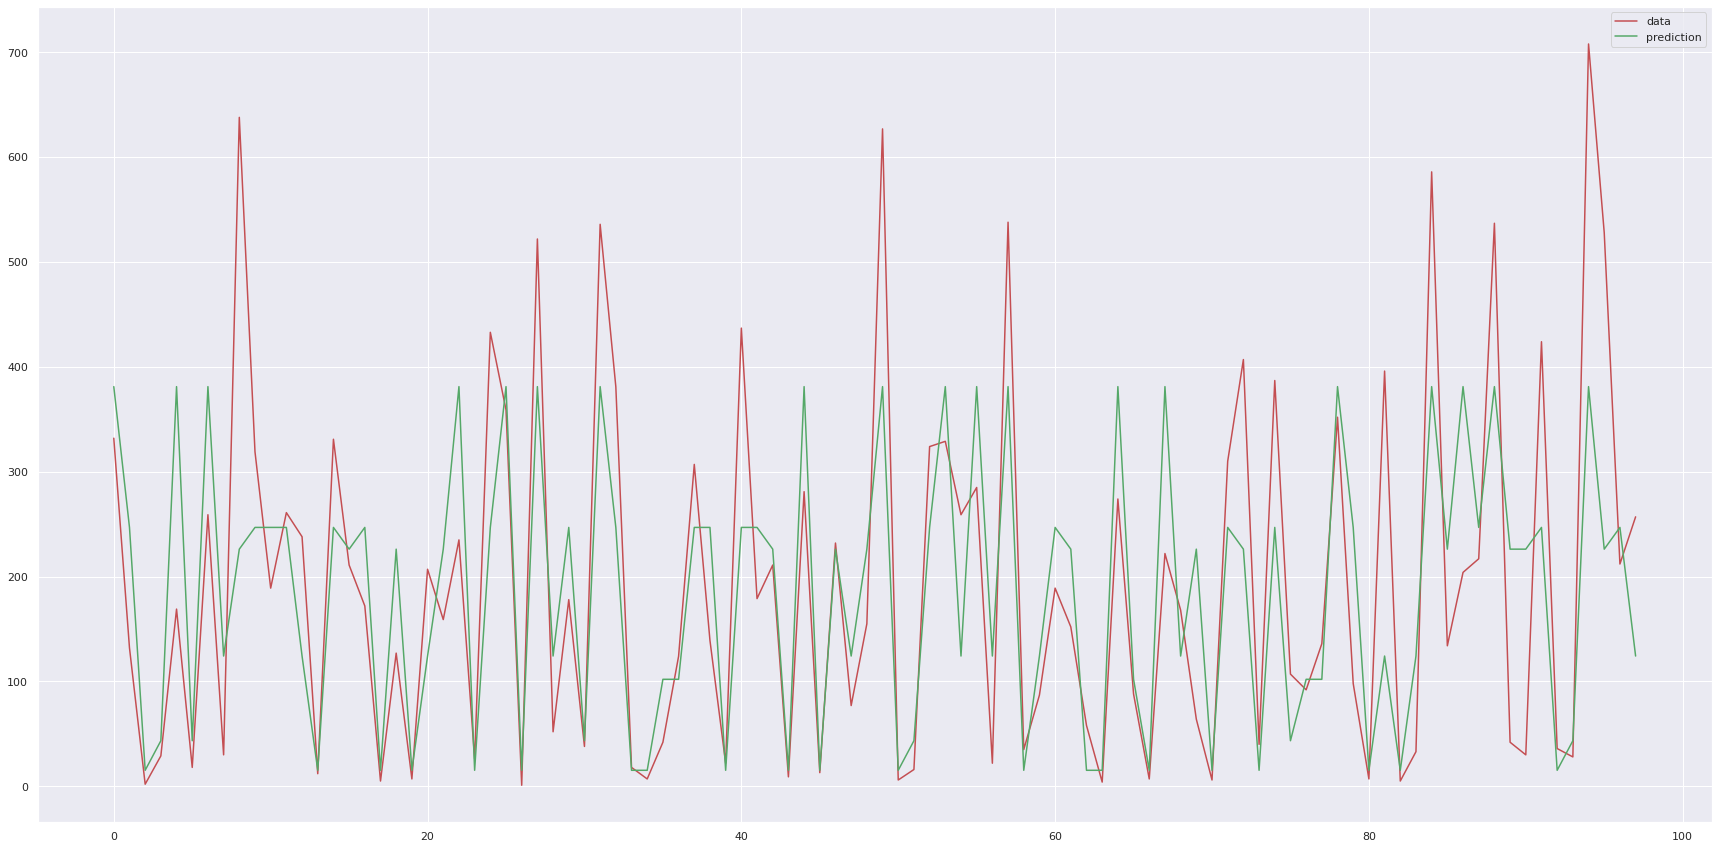

In [98]:
plt.figure(figsize=(30,15))
xx = np.stack(i for i in range(98))
plt.plot(xx, y_test[:98], c='r', label='data')
plt.plot(xx, y_predict[:98], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

In [108]:
fold = TimeSeriesSplit(n_splits=5)

squared = []
friedman = []
absolute = []
poisson = []

options = ["squared_error", "friedman_mse", "absolute_error", "poisson"]

for max_depth in range(1,16):
  mediaSquared=[]
  mediaFriedman=[]
  mediaAbsolute=[]
  mediaPoisson=[]

  for train_fold, test_fold in fold.split(x_train):                                                                                                         
    x_test_kfold= x_train.iloc[test_fold]
    y_test_kfold= y_train.iloc[test_fold]
    x_train_kfold= x_train.iloc[train_fold]
    y_train_kfold= y_train.iloc[train_fold]
    
    for option in options:
      arbol = DecisionTreeRegressor(criterion=option, max_depth=max_depth)  
      arbol.fit(x_train_kfold, y_train_kfold)
      y_predict = arbol.predict(x_test_kfold)                                                                                     
      error=mean_absolute_error(y_test_kfold, y_predict)

      if option == "squared_error":
        mediaSquared.append((error, max_depth, option))
      elif option == "friedman_mse":
        mediaFriedman.append((error, max_depth, option))
      elif option == "absolute_error":
        mediaAbsolute.append((error, max_depth, option))
      elif option == "poisson":
        mediaPoisson.append((error, max_depth, option))
    
  media_s = []
  for x in mediaSquared:
    media_s.append(x[0])
    kU=x[1]
  squared.append((round(mean(media_s),5), kU))
  
  media_f = []
  for x in mediaFriedman:
    media_f.append(x[0])
    kD=x[1]
  friedman.append((round(mean(media_f),5), kD))
  
  media_a = []
  for x in mediaAbsolute:
    media_a.append(x[0])
    kU=x[1]
  absolute.append((round(mean(media_a),5), kU))
  
  media_p = []
  for x in mediaPoisson:
    media_p.append(x[0])
    kD=x[1]
  poisson.append((round(mean(media_p),5), kD))


In [109]:
min_Squared= min(squared)
min_Friedman= min(friedman)  
min_Absolute= min(absolute)
min_Poisson= min(poisson) 


print(f"SQUARED_ERROR: {min_Squared[0]}, max_depth: {min_Squared[1]}") 
print(f"FRIEDMAN_MSE: {min_Friedman[0]}, max_depth: {min_Friedman[1]}") 
print(f"ABSOLUTE_ERROR: {min_Absolute[0]}, max_depth: {min_Absolute[1]}") 
print(f"POISSON: {min_Poisson[0]}, max_depth: {min_Poisson[1]}") 

SQUARED_ERROR: 38.77319, max_depth: 13
FRIEDMAN_MSE: 39.1257, max_depth: 13
ABSOLUTE_ERROR: 39.29154, max_depth: 13
POISSON: 114.16005, max_depth: 15


In [110]:
minimum = min((min_Squared, "squared_error"), (min_Friedman, "friedman_mse"), (min_Absolute, "absolute_error"), (min_Poisson, "poisson"))
depths, criterio = minimum

print(f'Se usa: {criterio} con profundidad: {max_depth}')
arbol = DecisionTreeRegressor(criterion = criterio, max_depth=depths[1]) 
arbol.fit(x_train, y_train)
y_predict = arbol.predict(x_test)

Se usa: squared_error con profundidad: 15


In [111]:
error = mean_absolute_error(y_test, y_predict)
error

34.96744926191282

In [112]:
y_predict

array([330.29090909, 132.38461538,   3.42857143, ..., 230.        ,
       288.30898876, 155.875     ])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


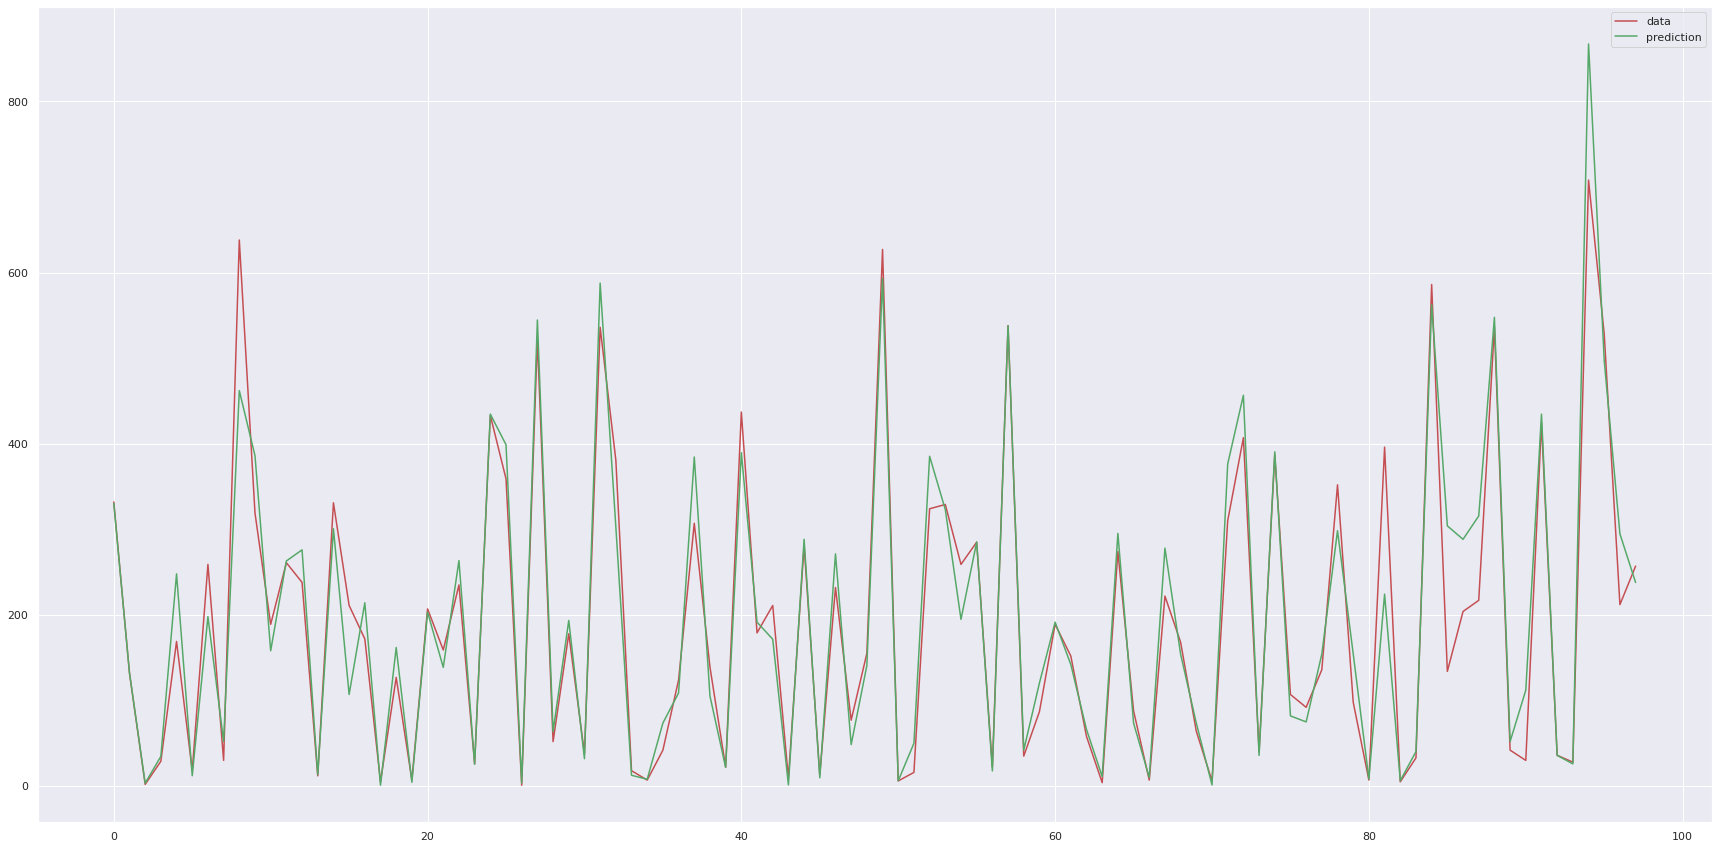

In [113]:
plt.figure(figsize=(30,15))
xx = np.stack(i for i in range(98))
plt.plot(xx, y_test[:98], c='r', label='data')
plt.plot(xx, y_predict[:98], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

In [114]:
importances = arbol.feature_importances_*100
print("Importancia:")
for feature, importance in zip(x_train.columns, importances):
    print(feature, " --> ", round(importance,3),"%")

Importancia:
season  -->  2.237 %
yr  -->  8.191 %
mnth  -->  1.568 %
hr  -->  62.627 %
workingday  -->  6.578 %
weathersit  -->  1.741 %
temp  -->  14.139 %
hum  -->  2.92 %


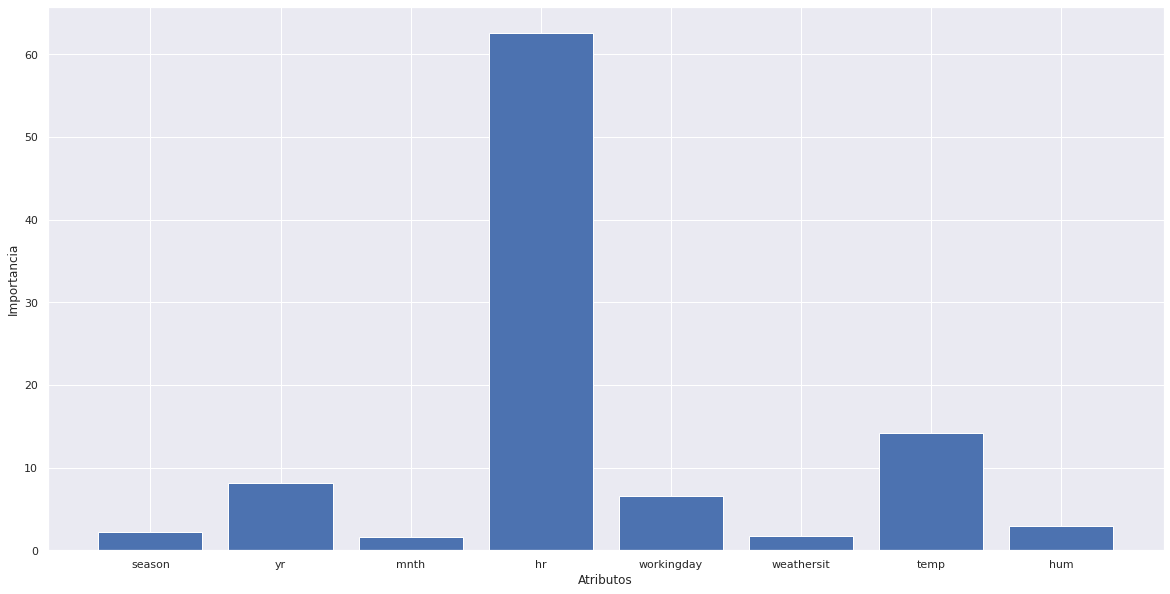

In [115]:
plt.figure(figsize=(20,10))
plt.bar(x_train.columns, importances)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()